In [15]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats
import csv
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [16]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

Collect x and sigma values from CSV:

In [17]:
xs = []
sigmas = []

with open('log_likelihood_data.csv', 'r', newline='') as csvfile:
    lnf_data = csv.reader(csvfile, delimiter='\t')
    
    i = 0
    for row in lnf_data:
        if (i>0):
            xs.append(float(row[0]))
            sigmas.append(float(row[2]))
        i+=1

csvfile.close()

# Convert to array datatype
xs = np.array(xs)
sigmas = np.array(sigmas)

In [18]:
# Print the xs and sigmas arrays
print("xs:")
print(xs)
print("sigmas:")
print(sigmas)

xs:
[ 2.17 -0.12  2.18  1.47 -1.68  2.4  -1.45  0.74 -0.11  3.85 -0.78 -1.34
 -0.18 -0.21 -1.08  0.04  0.66  2.46  4.39  1.26 -3.26  2.48  1.18 -0.51
  1.34  1.5   3.97  2.15  0.12  0.72 -2.86  1.54  0.89  0.62  2.86  0.32
  2.37 -0.74 -1.38]
sigmas:
[2.22 2.44 2.56 2.33 2.59 2.04 2.59 2.65 2.48 2.22 2.36 2.68 2.46 2.19
 2.36 2.54 2.92 2.21 2.09 2.44 2.1  2.31 2.74 2.44 2.32 2.02 2.77 2.51
 2.17 2.8  2.37 2.   2.91 2.75 2.1  2.75 2.72 2.18 2.96]


In [19]:
# proposal
def q(ln_mu):
    # add a random number drawn from a gaussian whose mean is the current position and the standard deviation is 1
    # randn() draws from a normalized gausian whose mean is 0 and stdev is 1
    return ln_mu + randn()

The log density function in this case is $\ln p(x) = \ln f(x)$, which is the log likelihood of x given $\mu$ and $\sigma$.

This means that our log likelihood function is:
$$ln(L) = \sum_{i=1}^N \left[ ln \left(\frac{1}{\sigma_i\sqrt{2\pi}}\right) -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma_i}\right)^2\right]$$

In [20]:
# density function f(x) = 1 * p(x)
#def f(x):
#    mu = 2
#    sigma = math.sqrt(2)
#    return 1.0/(sigma*math.sqrt(2.0*pi)) * exp(-0.5 * ((x-mu)/sigma)**2)

In [22]:
# therefore, ln_p = ln_f is different

# log likelihood function
def make_log_likelihood_fn(xs, sigmas):
    
    def log_l(mu):
        # initialize the log likelihood function
        ln_likelihood = 0.0

        # loop for all values of x in the x-array
        for i in range(len(xs)):
            xi = xs[i]
            mu_i = mu
            sigma_i = sigmas[i]

            # calculate each term
            term = np.log(1.0 / (sigma_i*np.sqrt(2.0*np.pi))) \
            - 0.5 * (xi-mu_i) * (xi-mu_i) / (sigma_i*sigma_i)

            # increment log-likelihood
            ln_likelihood += term

            # print statement to debug code
            #print("x: " + str(xi) + " | sigma: " + str(sigma_i) + " | Term being added: " + str(term))
            
            return ln_likelihood
        
    return log_l

lnf = make_log_likelihood_fn(xs, sigmas)

Run the MCMC algorithm by sampling different values of $\mu$ (or is it ln $\mu$?)

In [27]:
ln_mus = [1.0]    # initialize MCMC algorithm with arbitrary starting value of ln_mu
#pxs = [f(1.0)]  # initialize array of p(x)=f(x) values

# taking steps of ln(mu)
for i in range(10000):
    ln_mu = ln_mus[-1]                              # initialize current lnx value as the last entry of lnxs array
    ln_mu_new = q(ln_mu)
    accept_diff = lnf(ln_mu_new) - lnf(ln_mu)
    if math.log(rand()) < accept_diff:
        ln_mus.append(ln_mu_new)
#        pxs.append(f(lnx_new))
    else:
        ln_mus.append(ln_mu)
#        pxs.append(f(lnx))

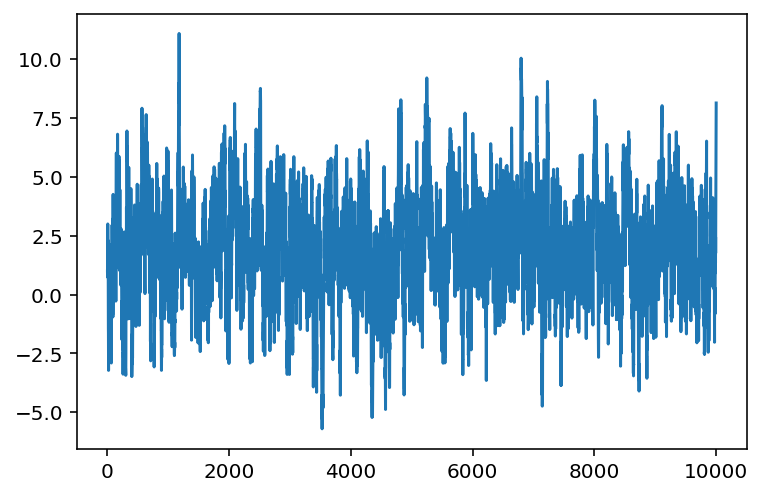

In [28]:
plot(ln_mus)

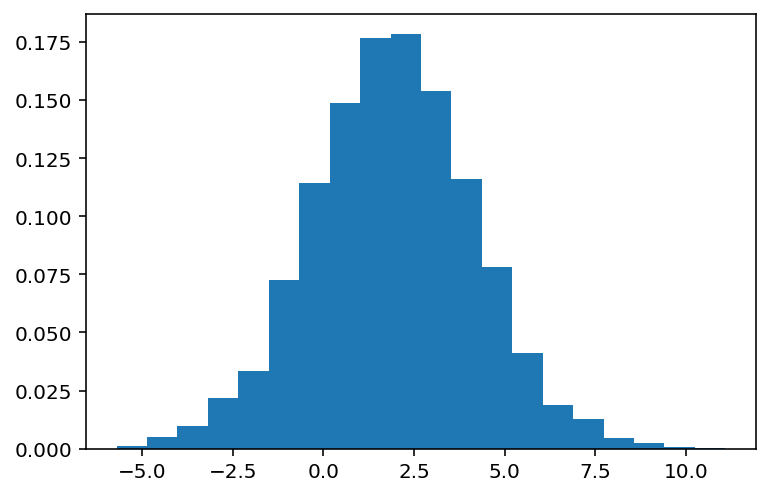

In [33]:
# histogram
hist(ln_mus, density=True, bins=20)

# original gaussian distribution
#xlist = np.linspace(-5,10,100)
#ylist = lnf(xlist)
#ylist = exp(ylist)
#plot(xlist, ylist)

# display the superimposed plots
show()